In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from ophys_etl.modules.mesoscope_splitting.full_field_utils import stitch_full_field_tiff
from pathlib import Path
fn = Path(r'\\allen\programs\mindscope\production\learning\prod0\specimen_1321284525\ophys_session_1328828974') / '1328828974_stitched_full_field_img.h5'
with h5py.File(fn, 'r') as h:
    print(list(h.keys()))


c:\Users\jinho.kim\Anaconda3\envs\allenvisb\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jinho.kim\Anaconda3\envs\allenvisb\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jinho.kim\Anaconda3\envs\allenvisb\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
c:\Users\jinho.kim\Anaconda3\envs\allenvisb\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['full_field_metadata', 'stitched_full_field', 'stitched_full_field_with_rois', 'surface_roi_metadata']


In [2]:
with h5py.File(fn, 'r') as h:
    stitched = h['stitched_full_field'][:]
    stitched_with_rois = h['stitched_full_field_with_rois'][:]

In [3]:
stitched.shape

(1532, 1610)

In [4]:
5000/1600

3.125

In [5]:
stitched.max()

65535

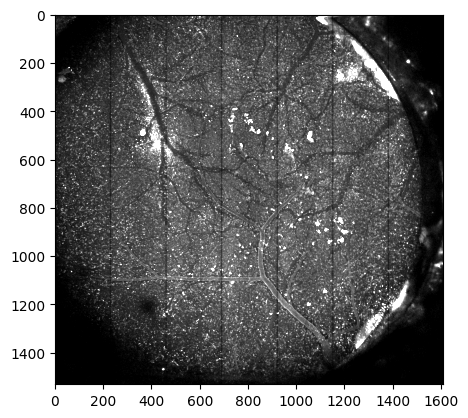

In [7]:
plt.imshow(stitched, vmin=300, vmax=2000, cmap='gray')

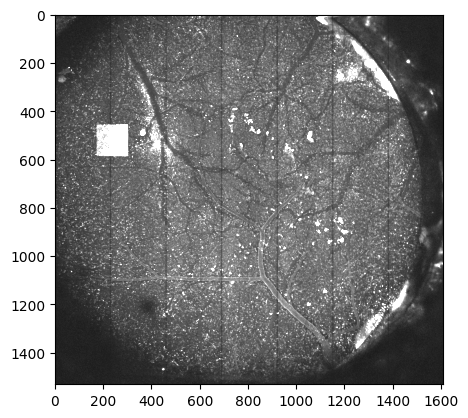

In [8]:
plt.imshow(stitched_with_rois, vmax=2000, cmap='gray')

# Stitching fullfield image
- Using ophys_etl_pipeline

In [8]:
fullfield_dir = Path(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\vivian_ha\mesoscope_experiements\717489')
fullfield_fn = fullfield_dir / 'fullfield_stack_00001.tif'
imgs = stitch_full_field_tiff(fullfield_fn)
print(imgs.shape)

(1532, 1610)


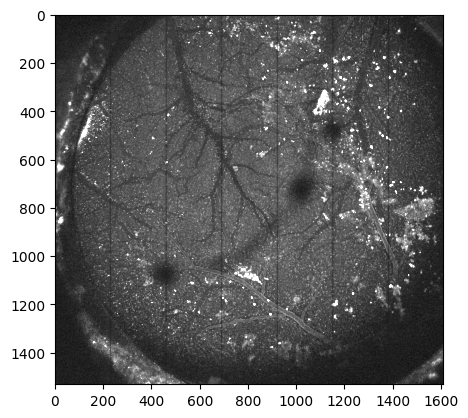

In [9]:
plt.imshow(imgs,cmap='gray',vmin=np.percentile(imgs,1),vmax=np.percentile(imgs,99),aspect='equal')